**TODO**: replace this with a package pull.

In [1]:
!aws s3 cp s3://quilt-example/quilt/open_fruit/training_data/X_meta.csv X_meta.csv --quiet
!aws s3 sync s3://quilt-example/quilt/open_fruit/images_cropped/ images_cropped/ --quiet
!rm -rf 'images_cropped/Mango'
!rm -rf 'images_cropped/Common_fig'
!rm -rf 'images_cropped/Cantaloupe'
!rm -rf 'images_cropped/Pomegranate'

In [2]:
import pandas as pd

X_meta = pd.read_csv('X_meta.csv')

In [3]:
X_meta.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside,OriginalURL,CroppedImageURL
0,0000a16e4b057580,xclick,Watermelon,1,0.000000,0.183750,0.146667,0.282500,1,1,0,0,0,516015907_5b1c0effdb_o.jpg,Watermelon/516015907_5b1c0effdb_o_0.jpg
1,0000a16e4b057580,xclick,Watermelon,1,0.027500,0.156250,0.025000,0.198333,1,0,0,0,0,516015907_5b1c0effdb_o.jpg,Watermelon/516015907_5b1c0effdb_o_1.jpg
2,0000a16e4b057580,xclick,Watermelon,1,0.279375,0.410625,0.070833,0.184167,1,0,0,0,0,516015907_5b1c0effdb_o.jpg,Watermelon/516015907_5b1c0effdb_o_2.jpg
3,0000a16e4b057580,xclick,Watermelon,1,0.551875,0.719375,0.048333,0.227500,1,0,0,0,0,516015907_5b1c0effdb_o.jpg,Watermelon/516015907_5b1c0effdb_o_3.jpg
4,0000a16e4b057580,xclick,Watermelon,1,0.568750,0.921250,0.262500,0.734167,0,0,0,0,0,516015907_5b1c0effdb_o.jpg,Watermelon/516015907_5b1c0effdb_o_4.jpg


In [4]:
import os

labels_count = dict()
for img_class in [ic for ic in os.listdir('images_cropped/') if ic[0] != '.']:
    labels_count[img_class] = len(os.listdir('images_cropped/' + img_class))
total_count = sum(labels_count.values())

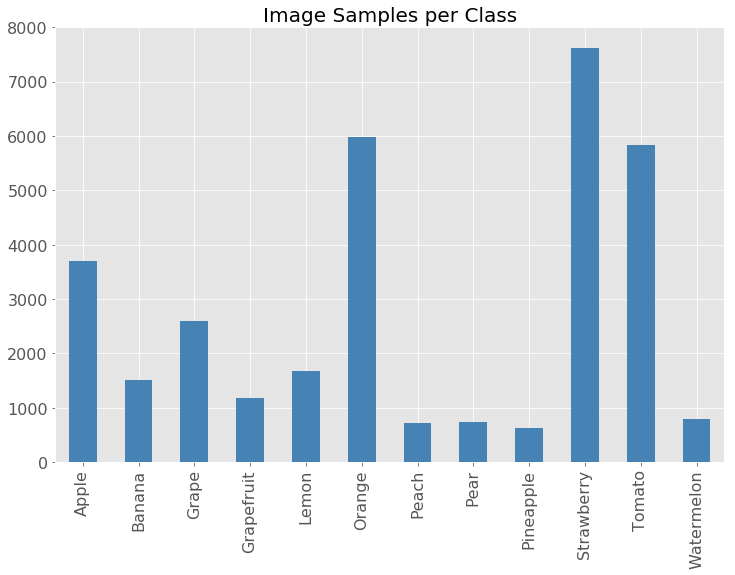

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
ax = pd.Series(labels_count).plot.bar(color='steelblue', figsize=(12, 8), fontsize=16)
ax.set_title("Image Samples per Class", fontsize=20)
pass

In [41]:
np.random.choice?

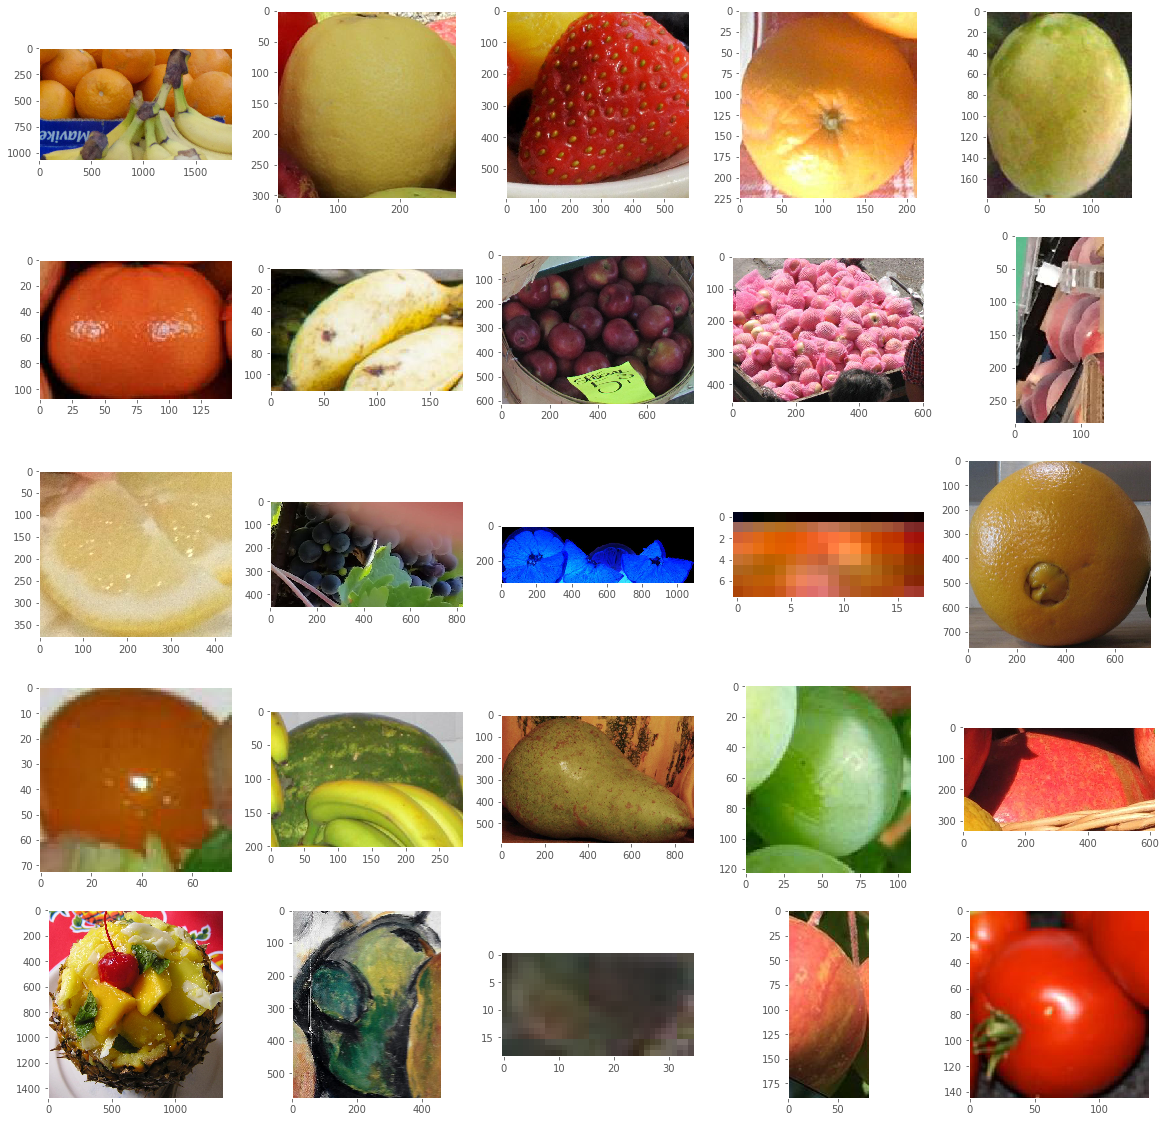

In [44]:
import numpy as np
import pathlib
from matplotlib.image import imread

sample_images = list(pathlib.Path('images_cropped/').rglob('*/*/'))
np.random.seed(42)
rand_imgs = np.random.choice(sample_images, size=5*5)
fig, axarr = plt.subplots(5, 5, figsize=(20, 20))

for i, rand_img in enumerate(rand_imgs):
    j = i // 5
    k = i % 5
    axarr[j][k].imshow(imread(rand_img))
    axarr[j][k].grid(False)

In [50]:
shapes = []
for img in rand_imgs:
    shapes.append(imread(img).shape)
    
shapes = pd.DataFrame().assign(X=pd.Series(shapes).map(lambda s: s[0]), Y=pd.Series(shapes).map(lambda s: s[1]))

In [57]:
sns.kdeplot

<function seaborn.distributions.kdeplot(data, data2=None, shade=False, vertical=False, kernel='gau', bw='scott', gridsize=100, cut=3, clip=None, legend=True, cumulative=False, shade_lowest=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, **kwargs)>

(-902.2570602360794, 2768.2570602360797)

(0, 2187.5)

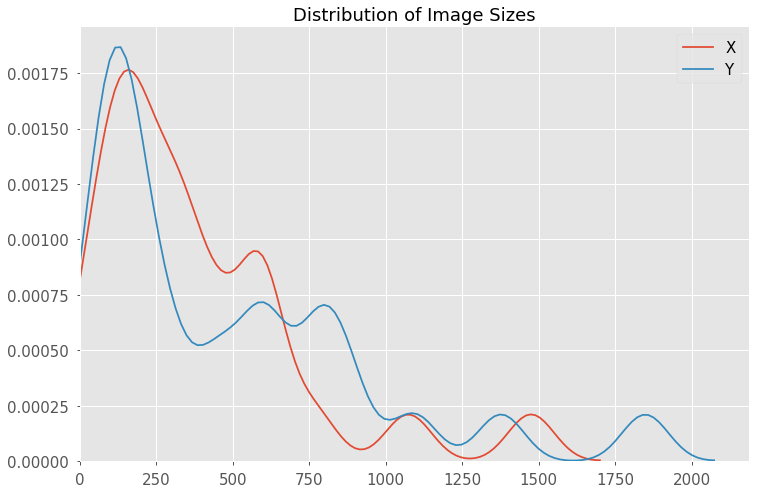

In [78]:
import seaborn as sns

plt.figure(figsize=(12, 8))

sns.set_context("notebook", font_scale=1.5)
sns.kdeplot(shapes['X'], bw=75)
sns.kdeplot(shapes['Y'], bw=75)

plt.title('Distribution of Image Sizes')
ax = plt.gca()
ax.set_xlim(0, ax.get_xlim()[1])